In [ ]:
pip install fuzzywuzzy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import os
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import warnings
from tkinter import *
from PIL import Image,ImageTk
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
movies='movies.csv'
ratings="ratings.csv"
df_movies=pd.read_csv(movies, usecols=['movieId','title'],dtype={'movieId':'int32','title':'str'})
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


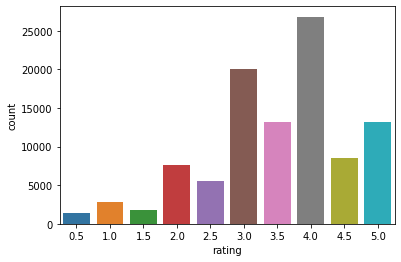

In [ ]:
sns.countplot(df_ratings.rating)

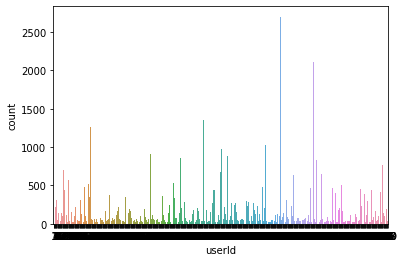

In [ ]:
sns.countplot(df_ratings.userId)

In [ ]:
df_movies=pd.read_csv(movies, usecols=['movieId','title'],dtype={'movieId':'int32','title':'str'})
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [ ]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


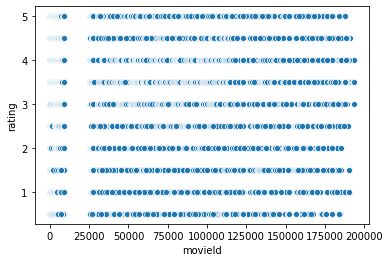

In [ ]:
sns.scatterplot(x=df_ratings.movieId,y=df_ratings.rating)

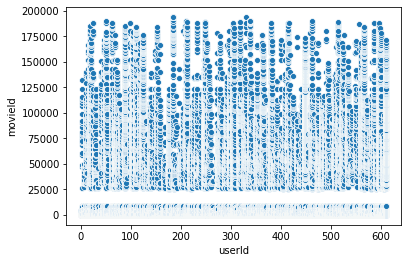

In [ ]:
sns.scatterplot(x=df_ratings.userId,y=df_ratings.movieId)

In [ ]:
#Sparse Matrix
movies_users=df_ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movies_users
mat_movies_users=csr_matrix(movies_users.values)

In [ ]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20)

In [ ]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
print(df_movies['title'][1])

Jumanji (1995)


In [ ]:
def recommender(movie_name,data,model,n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name,df_movies['title'])[2]
    print('Movie Selected : ',df_movies['title'][idx], 'Index: ',idx)
    print('Searching For Recommendation.......')
    distances,indices=model.kneighbors(data[idx],n_neighbors=n_recommendations)
    for i in indices:
        rec=df_movies['title'][i].where(i!=idx).values
        
    
    return rec

In [ ]:
Movie_Name=input("Enter Movie Name ")
print(recommender(Movie_Name,mat_movies_users,model_knn,5))

Enter Movie Name Waiting to Exhale
Movie Selected :  Waiting to Exhale (1995) Index:  3
Searching For Recommendation.......
[nan 'Before and After (1996)' 'Gordy (1995)' 'Walking Dead, The (1995)'
 'Bliss (1997)']


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving movie-and-popcorn.jpg to movie-and-popcorn.jpg
User uploaded file "movie-and-popcorn.jpg" with length 134194 bytes


In [ ]:
class Gui:
    def __init__(s):
        s.loginpage()
    def loginpage(s):
        try:
            s.scr.destroy()
        except:
            pass
        
        s.scr=Tk()
        s.scr.geometry('1000x500+0+0')
        
        l=Label(s.scr,bg='grey',fg='white',font=('times',15,'bold'),text='MOVIE RECOMENDATION SYSTEM')
        l.pack(side=TOP,fill=X)
        
        load=Image.open("movie-and-popcorn.jpg")
        render=ImageTk.PhotoImage(load)
        
        img=Label(image=render)
        img.pack(fill=BOTH)
        
        s.l1=Label(s.scr,bg='grey',fg='white',font=('times',20,'bold'),text='Enter Movie Name')#Movie name entry
        s.l1.pack()
        s.l1.place(x=150,y=100)
             
        s.user=Text(s.scr,bg='grey',fg='white',height=1,font=('times',20,'bold'),width=30)#Movie name entry
        s.user.pack()
        s.user.place(x=450,y=100)
        
        s.b=Button(s.scr,text='Show Movies',command=s.predict,bg='grey',fg='white',font=('times',15,'bold'),width=30)# Show movies
        s.b.place(x=300,y=420)
                
        s.scr.title("Movie Recomendation System")
        s.scr.mainloop()
    def predict(s):
        
        ip=s.user.get("1.0","end-1c")
        if ip is '':
            
            a=Label(s.scr,bg='grey',fg='white',font=('times',30,'bold'))
            a.place(x=320,y=150)
            a.config(text="Name a movie") 
        
        else :
            
            recc=recommender(ip,mat_movies_users,model_knn,5)
            
            a=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            a.place(x=320,y=150)
            a.config(text=recc[0])
            
            b=Label(s.scr,bg='grey',fg='white',font=('times',10,))
            b.place(x=320,y=170)
            b.config(text=recc[1])
            
            c=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            c.place(x=320,y=190)
            c.config(text=recc[2])
            
            d=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            d.place(x=320,y=210)
            d.config(text=recc[3])
            
            e=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            e.place(x=320,y=230)
            e.config(text=recc[4])

Gui()

TclError: ignored